In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [18]:
df = pd.read_csv('iris.data.csv')

In [19]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [20]:
iris = datasets.load_iris()
Irisdf = pd.DataFrame(iris.data,columns=iris.feature_names)
Irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [22]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [23]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
Dataframe = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'm': iris.data[:,2],
    'n': iris.data[:,3],
    'cluster' : iris.target
})

In [25]:
Dataframe

,x,y,m,n,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
Centroids = {}
for i in range(3):
    result_list = []
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['x'].mean())
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['y'].mean())
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['m'].mean())
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['n'].mean())

    Centroids[i] = result_list
print (Centroids)

{0: [5.006, 3.428, 1.4620000000000002, 0.24599999999999997], 1: [5.936, 2.7700000000000005, 4.26, 1.3259999999999998], 2: [6.587999999999998, 2.974, 5.5520000000000005, 2.0260000000000002]}


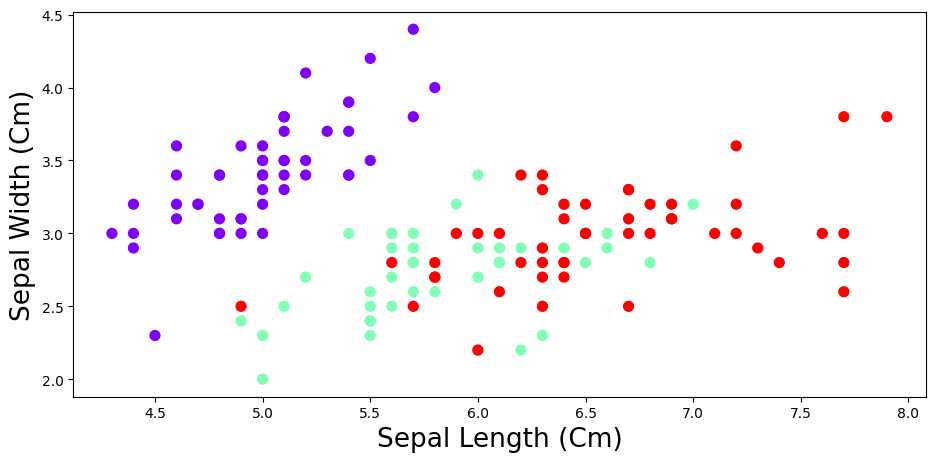

In [27]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], c=iris.target, cmap='rainbow',  s=50 )
plt.xlabel('Sepal Length (Cm)', fontsize=19)
plt.ylabel('Sepal Width (Cm)', fontsize=19)
plt.show()

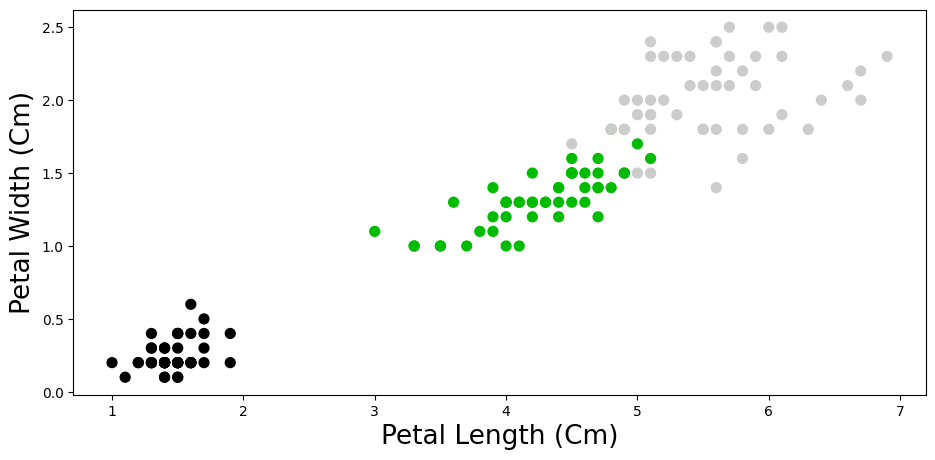

In [28]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], c=iris.target, cmap='nipy_spectral',  s=50 )
plt.xlabel('Petal Length (Cm)', fontsize=19)
plt.ylabel('Petal Width (Cm)', fontsize=19)
plt.show()

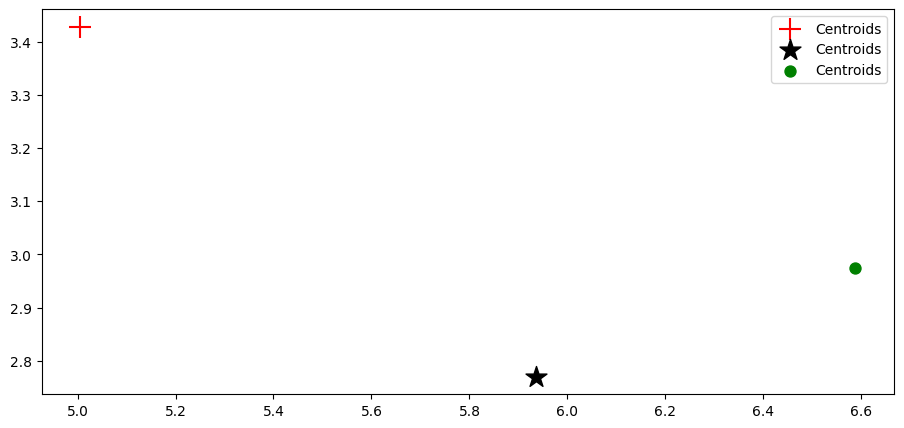

In [29]:
fig = plt.figure(figsize=(11, 5))
colmap = {0: 'red', 1: 'black', 2: 'green'}
markers = {0: '+', 1: '*', 2: '.'}
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=250, label= 'Centroids')
plt.legend()

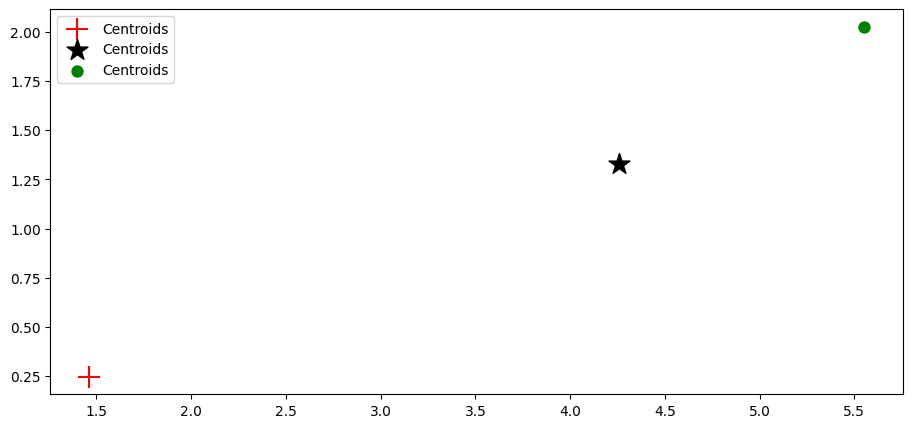

In [30]:
fig = plt.figure(figsize=(11, 5))
colmap = {0: 'red', 1: 'black', 2: 'green'}
markers = {0: '+', 1: '*', 2: '.'}
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=250, label= 'Centroids')
plt.legend()

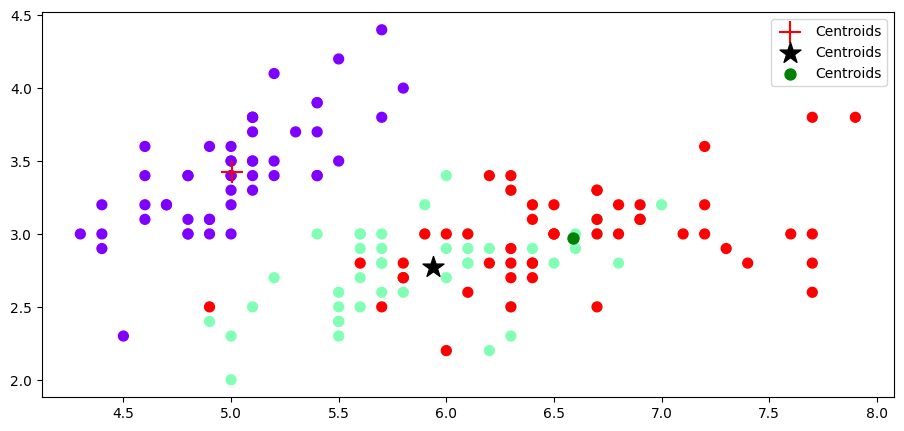

In [31]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], c=iris.target, cmap='rainbow',  s=50 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=250, label= 'Centroids')
plt.legend()

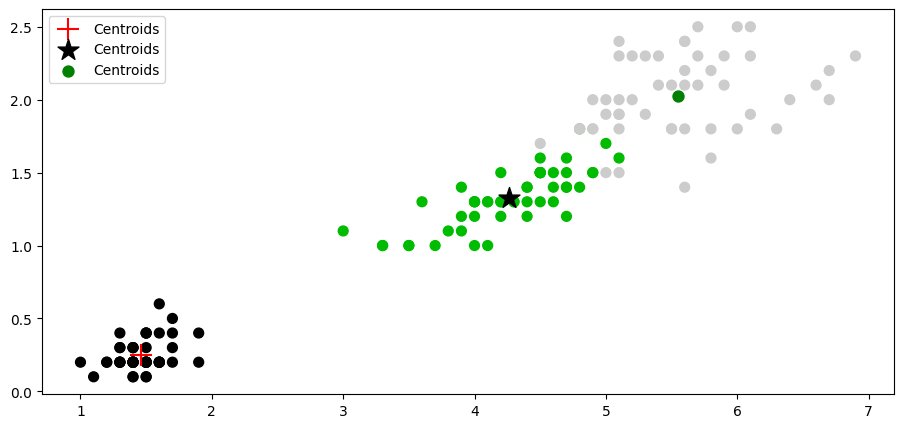

In [32]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], c=iris.target, cmap='nipy_spectral',  s=50 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=250, label= 'Centroids')
plt.legend()

In [33]:
def assignment(Dataframe, Centroids):
    for i in range(3):
        Dataframe['distance_from_{}'.format(i)] = (
            np.sqrt(
                (Dataframe['x'] - Centroids[i][0]) ** 2
                + (Dataframe['y'] - Centroids[i][1]) ** 2
               +(Dataframe['x'] - Centroids[i][0]) ** 2
                + (Dataframe['y'] - Centroids[i][1]) ** 2

            )
        )
    Centroid_distance_cols = ['distance_from_{}'.format(i) for i in Centroids.keys()]
    Dataframe['closest'] = Dataframe.loc[:, Centroid_distance_cols].idxmin(axis=1)
    Dataframe['closest'] = Dataframe['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    Dataframe['color'] = Dataframe['closest'].map(lambda x: colmap[x])
    return Dataframe

In [34]:
Dataframe = assignment(Dataframe, Centroids)
Dataframe

,x,y,m,n,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,1.4,0.2,0,0.167451,1.569583,2.231959,0,red
1,4.9,3.0,1.4,0.2,0,0.623570,1.500797,2.387476,0,red
2,4.7,3.2,1.3,0.2,0,0.539667,1.850727,2.689097,0,red
3,4.6,3.1,1.5,0.2,0,0.738133,1.946174,2.817098,0,red
4,5.0,3.6,1.4,0.2,0,0.243393,1.769178,2.413968,0,red
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2.470959,1.128358,0.162604,2,green
146,6.3,2.5,5.0,1.9,2,2.251941,0.640931,0.784372,1,black
147,6.5,3.0,5.2,2.0,2,2.197826,0.861390,0.129769,2,green
148,6.2,3.4,5.4,2.3,2,1.689035,0.966019,0.814886,2,green


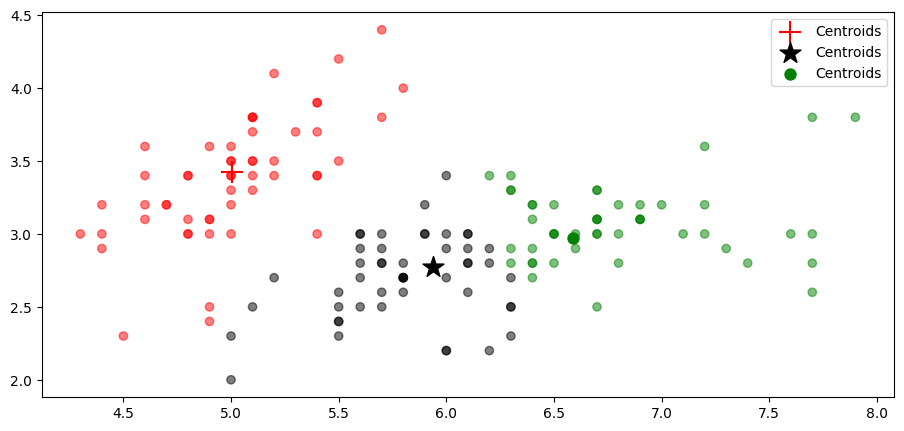

In [35]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'], alpha = 0.5 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=250, label= 'Centroids')
plt.legend()

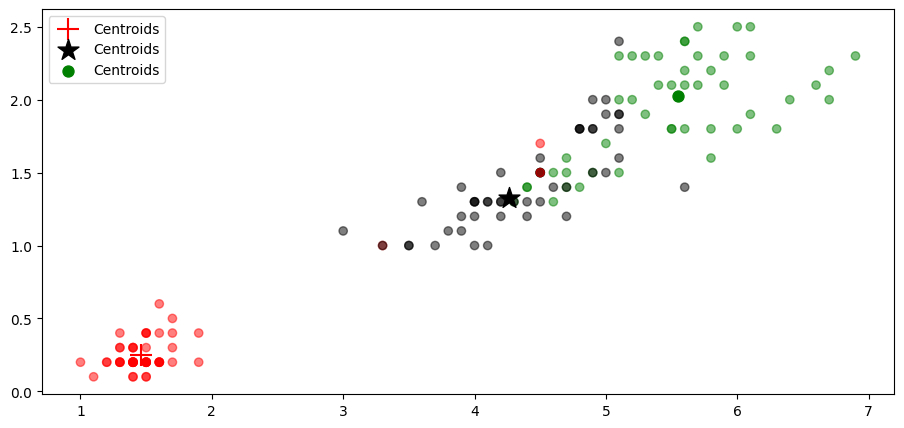

In [36]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'], alpha=.5 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=250, label= 'Centroids')
plt.legend()

In [37]:
def update(k):
    for i in range(3):
        Centroids[i][0] = np.mean(Dataframe[Dataframe['closest'] == i]['x'])
        Centroids[i][1] = np.mean(Dataframe[Dataframe['closest'] == i]['y'])
        Centroids[i][2] = np.mean(Dataframe[Dataframe['closest'] == i]['m'])
        Centroids[i][3] = np.mean(Dataframe[Dataframe['closest'] == i]['n'])
    return k

In [38]:
Centroids = update(Centroids)

In [39]:
Dataframe = assignment(Dataframe, Centroids)

In [40]:
while True:
    closest_Centroids = Dataframe['closest'].copy(deep=True)
    Centroids = update(Centroids)
    Dataframe = assignment(Dataframe, Centroids)
    if closest_Centroids.equals(Dataframe['closest']):
        break

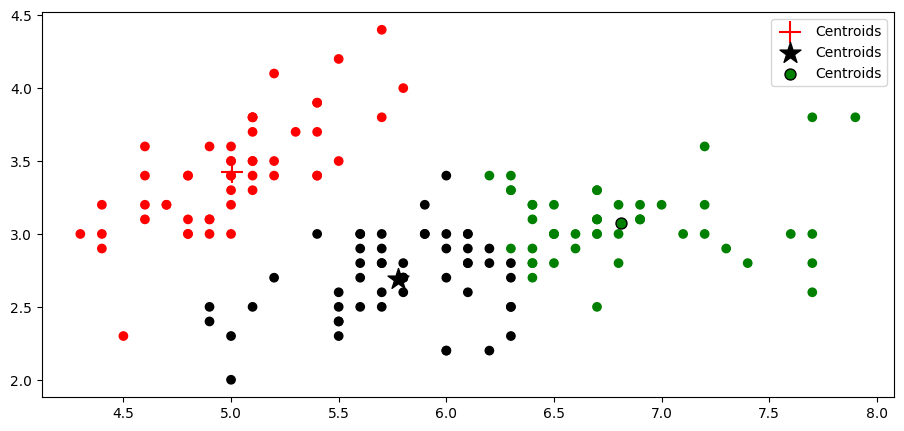

In [41]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'] )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=250, label= 'Centroids', edgecolor='k' )
plt.legend()

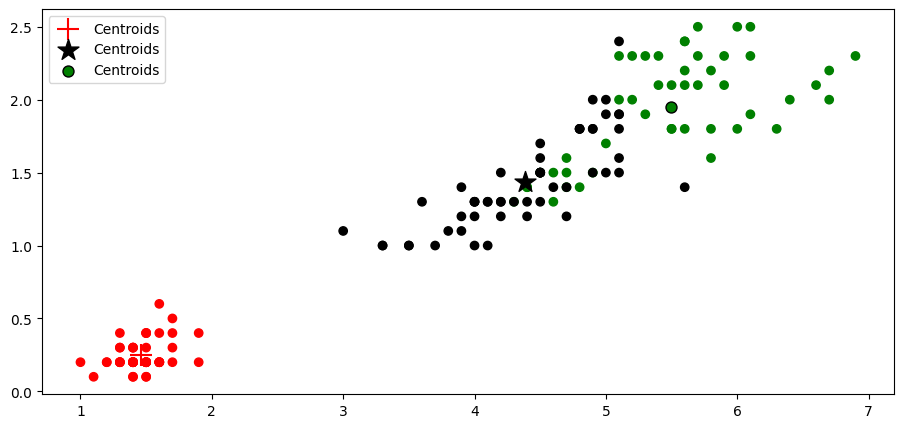

In [42]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'])
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=250, label= 'Centroids', edgecolor='k')
plt.legend()